# ISLR Chapter 8 Lab

In [13]:
library(tree)
library(ISLR)
attach(Carseats)

We watn to try to predict if sales are high or not. Since Sales is a continuous variable, we can change it into a class for our classification tree. Otherwise, it would try to predict the number of sales.

In [15]:
High = ifelse(Sales<=8, "No", "Yes")
Carseats = data.frame(Carseats, High)

In [21]:
Carseats[1:5,]

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


In [17]:
tree.carseats = tree(High~.-Sales, Carseats)

In [24]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

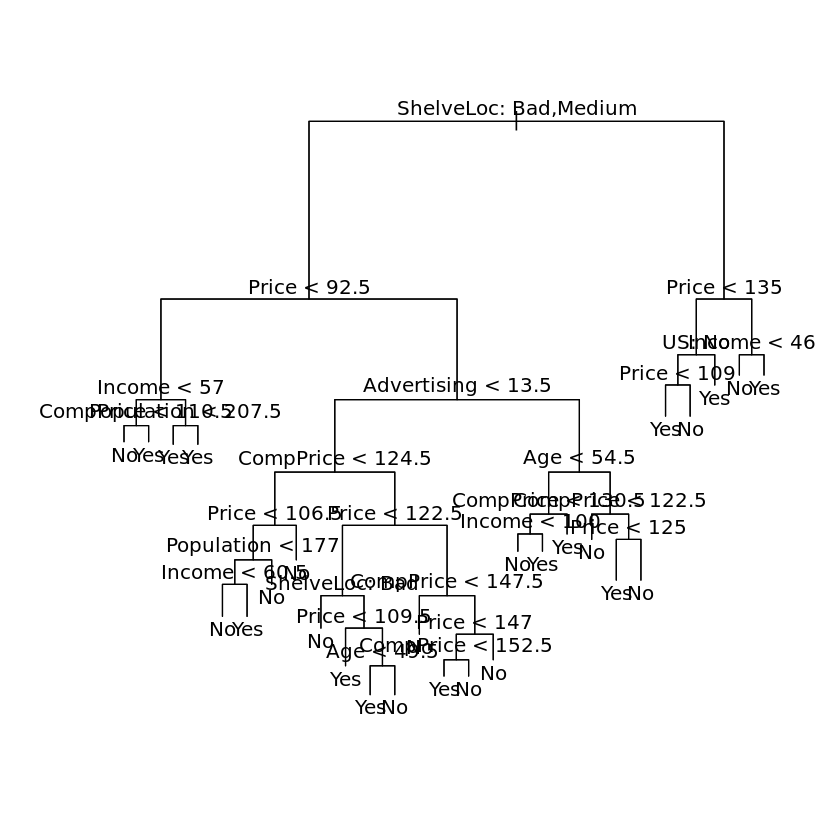

In [36]:
# text form of the tree
tree.carseats

# Print the graphic of the tree
plot(tree.carseats)
text(tree.carseats, pretty=0)


We want to do predictions on this tree and see what our confusion matrix is.

In [50]:
set.seed(2)
train = sample(1:dim(Carseats)[1], 200)
Carseats.test=Carseats[-train,]
High.test = High[-train]
tree.carseats=tree(High~.-Sales, Carseats, subset=train)
tree.pred=predict(tree.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

Will pruning the tree lead to improved results? We want to generalize more and prune out unnecessary leaves if we have lower MSE on a tree with less leaves.

In [70]:
set.seed(3)
#FUN=prune.misclass tells it to use the classification
# error rate to guide CV/pruning process, instead of default cv.tree()
# which does it on deviance.
cv.carseats=cv.tree(tree.carseats, FUN=prune.misclass)
names(cv.carseats)
cv.carseats

[1] "size"   "dev"    "k"      "method"

$size
[1] 19 17 14 13  9  7  3  2  1

$dev
[1] 55 55 53 52 50 56 69 65 80

$k
[1]       -Inf  0.0000000  0.6666667  1.0000000  1.7500000  2.0000000  4.2500000
[8]  5.0000000 23.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

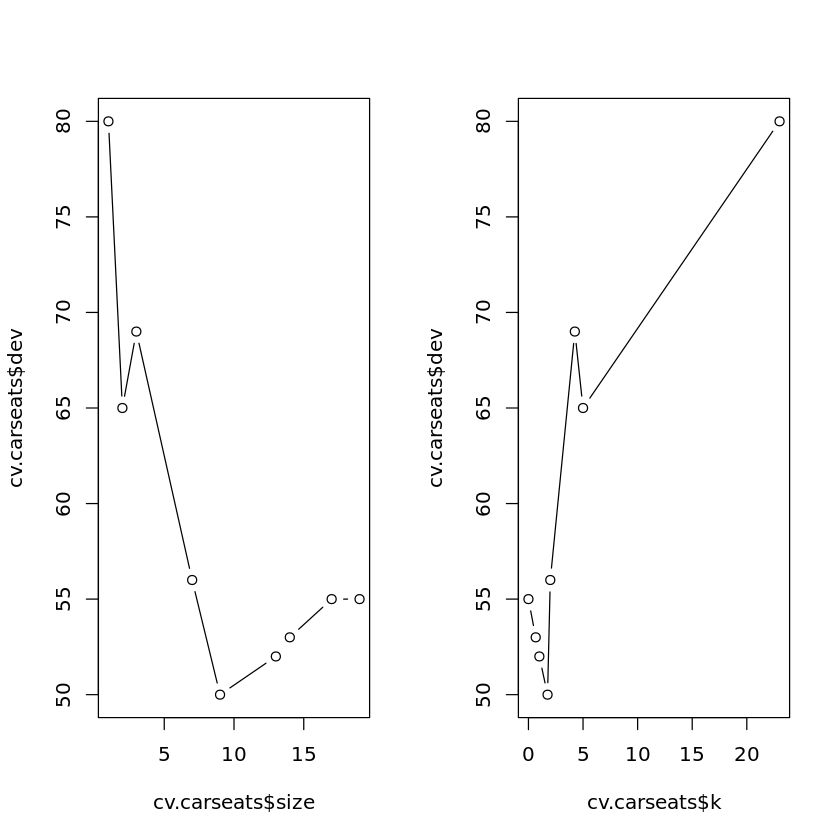

In [55]:
par(mfrow=c(1,2))
plot(cv.carseats$size, cv.carseats$dev, type="b")
plot(cv.carseats$k, cv.carseats$dev, type="b")

In [61]:
#min(cv.carseats$dev) = 50
#which.() = index of 50
#cv.carseats$size[which...] = index of minimum
cv.carseats$size[which.min(cv.carseats$dev)]

[1] 9

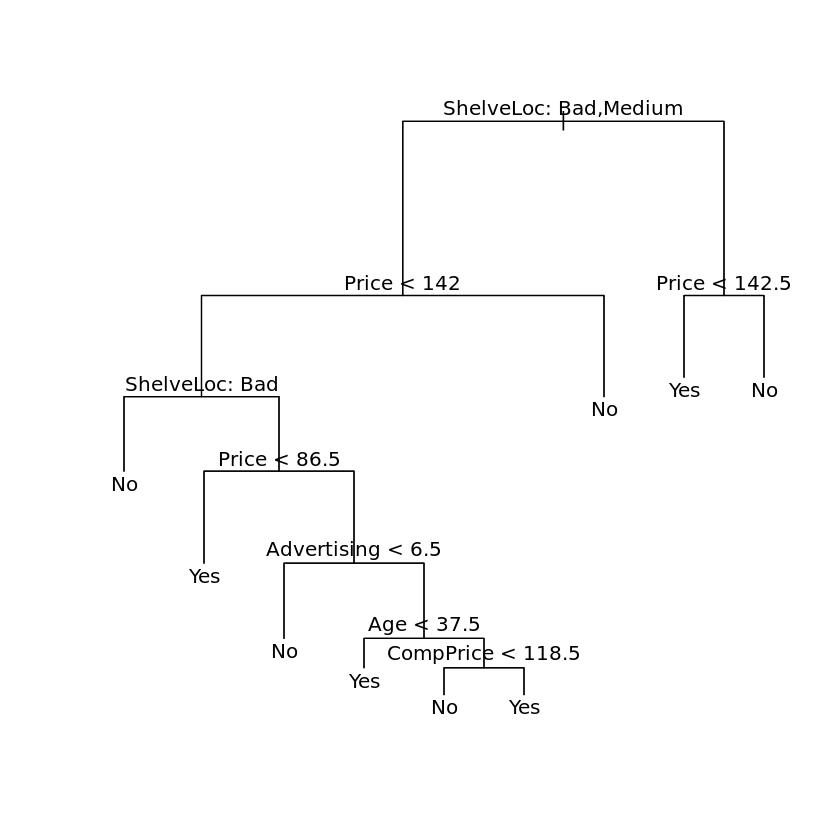

In [62]:
prune.carseats=prune.misclass(tree.carseats, best=9)
plot(prune.carseats)
text(prune.carseats, pretty=0)

This is a lot more legible and interpretable. Also, it has a better testing error.

In [63]:
tree.pred=predict(prune.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

         High.test
tree.pred No Yes
      No  86  22
      Yes 30  62

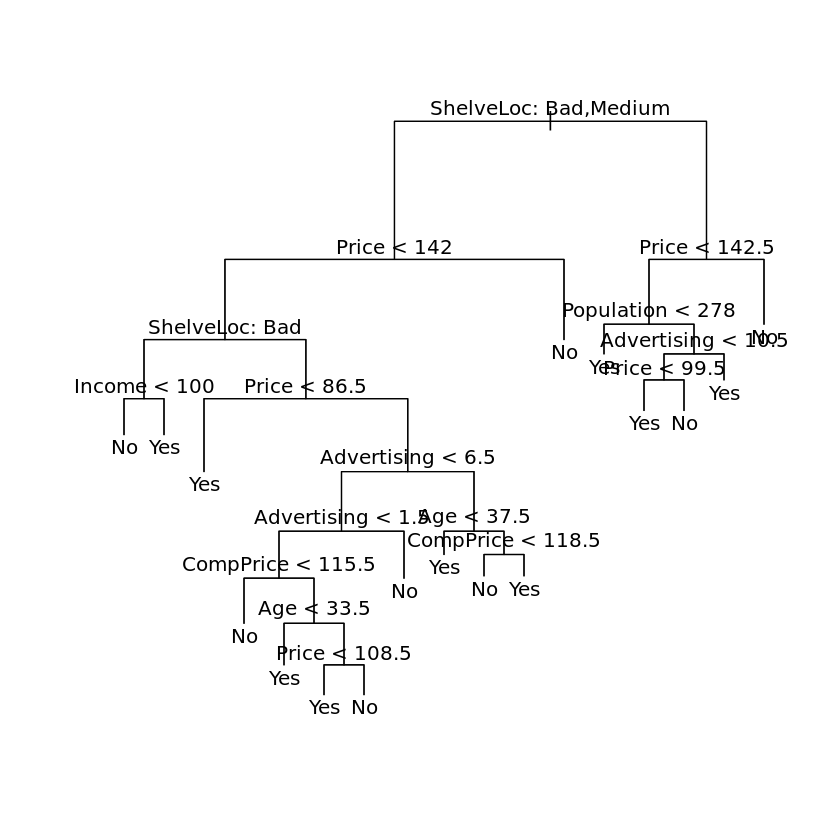

In [66]:
#If we pruned to a tree that doesn't have the minimum $dev.
prune.carseats=prune.misclass(tree.carseats, best=15)
plot(prune.carseats)
text(prune.carseats, pretty=0)
tree.pred=predict(prune.carseats, Carseats.test, type="class")
table(tree.pred, High.test)


### 8.3.2 Fitting Regression Trees

In [67]:
library(MASS)
set.seed(1)
train=sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~., Boston, subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

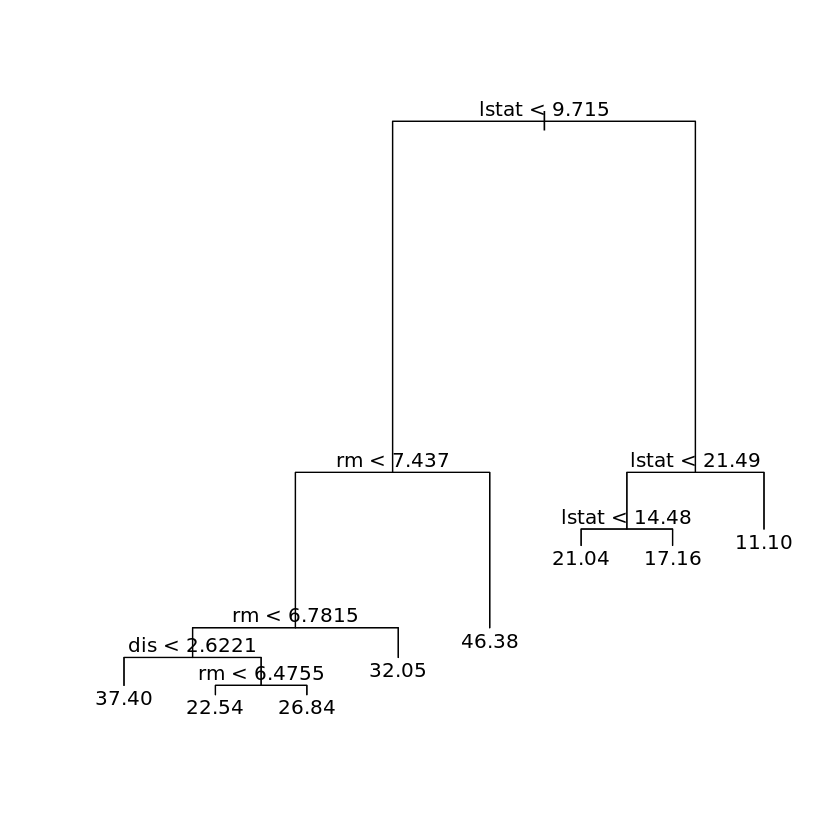

In [71]:
plot(tree.boston)
text(tree.boston, pretty=0)

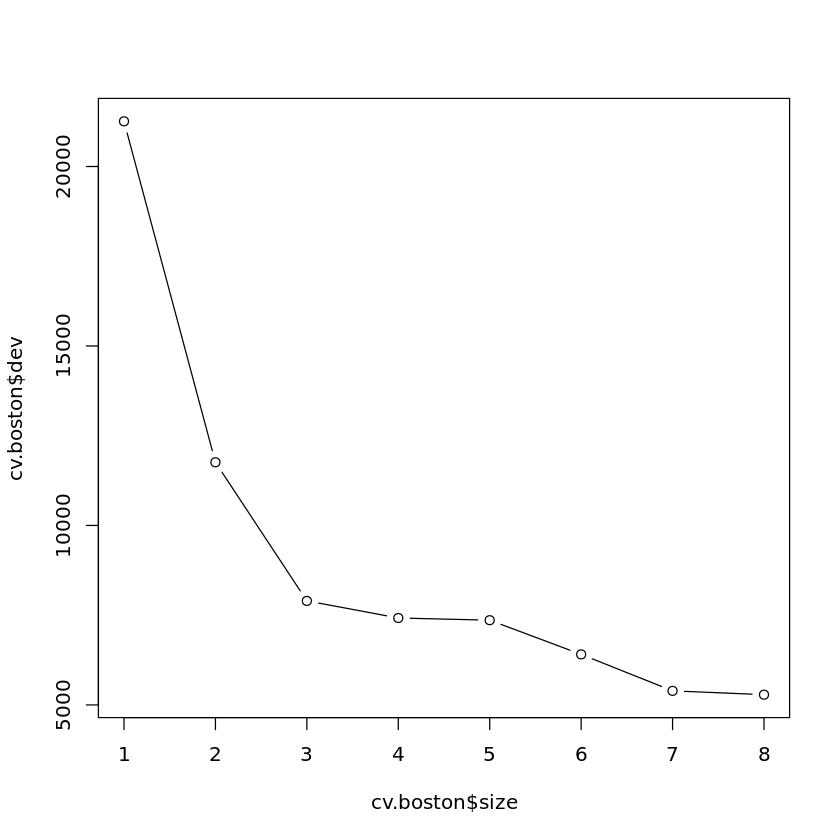

In [72]:
cv.boston = cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type='b')

Through cross validation, we can see that the biggest tree is the best.  But we can still prune the tree to however we want.

In [ ]:
prune.boston=prune.tree(tree.boston, best=5)
plot(prune.boston)
text(prune.boston, pretty=0)

In [ ]:
yhat=predict(tree.boston, newdata=Boston[-train,])
boston.test=Boston[-train, "medv"]
plot(yhat, boston.test)
abline(0,1)
mean((yhat-boston.test)^2) #MSE

### 8.3.3 Bagging and Random Forests

Create a random forest with several trees. ```mtry``` is the number of variables we consider at each split.

In [88]:
dim(Boston)

[1] 506  14

In [77]:
library(randomForest)
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston, subset=train, mtry=13, importance=TRUE)
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.15723
                    % Var explained: 86.49

[1] 13.50808

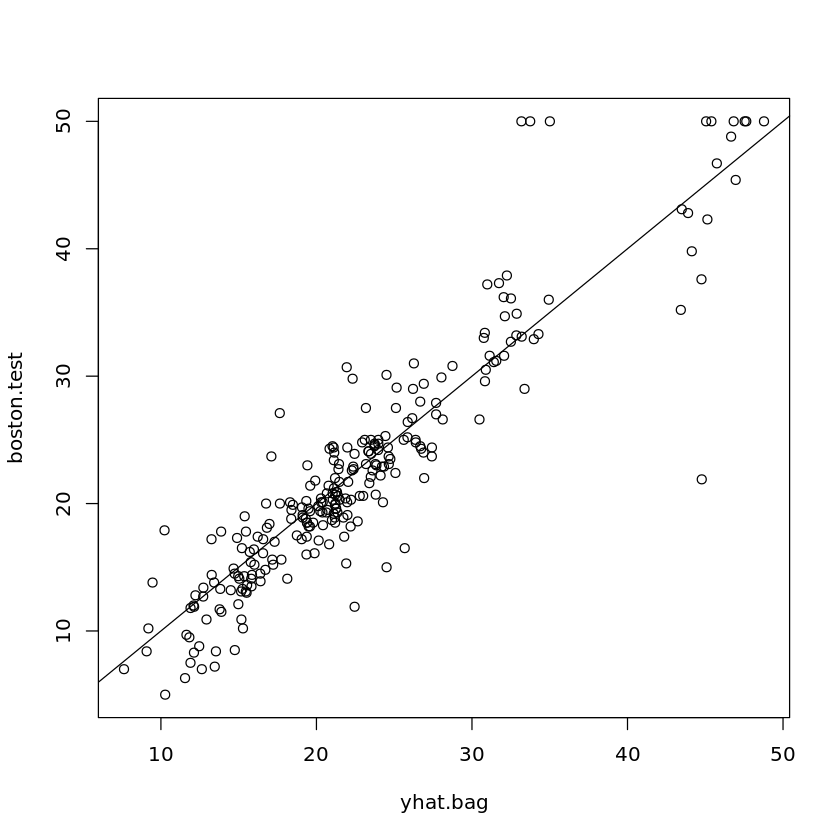

In [80]:
yhat.bag = predict(bag.boston, newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)

Obviously, we can see that the MSE here is much better than just a single tree!

We can also limit the number of trees that randomForest grows or change the number of variables that we consider.

In [84]:
bag.boston = randomForest(medv~.,data=Boston, subset=train, mtry=6, ntree=25)
yhat.bag = predict(bag.boston, newdata=Boston[-train, ])
mean((yhat.bag-boston.test)^2)

[1] 12.75723

The following function shows us which variables are significant.

In [87]:
importance(bag.boston)

,IncNodePurity
crim,1474.01862
zn,45.78493
indus,1025.69668
chas,140.51544
nox,795.08763
rm,5156.17056
age,642.94090
dis,1710.42810
rad,49.80982
tax,517.91855


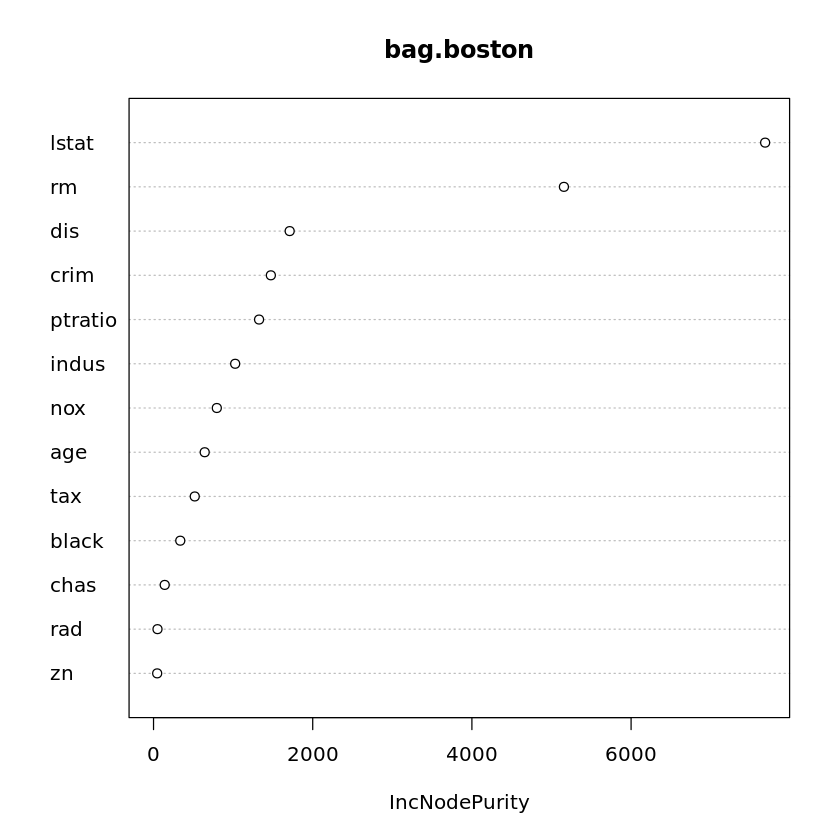

In [89]:
varImpPlot(bag.boston)